# WeatherPy

In [1]:
# Uncomment and run if citipy is not installed in your environment
# !pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90.000,90.000)
lng_range = (-180.000,180.000)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the city list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# Create url and define parameters to pass into it
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

params={
    'q':'city name',
    # Make sure to add your OpenWeatherMap API to api_keys.py
    'appid': weather_api_key,
    'units': 'imperial'
}

In [5]:
# List of city data
city_data = []

# Print to logger
print('Beginning Data Retrieval')
print('------------------------')

# Create counters
record_count = 0
set_count = 0

# Loop through all the cities 
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (index % 50 == 0):
        set_count += 1
        record_count = 0
    
    # Set city in endpoint url params
    params['q'] = city
    
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(weather_url, params).json()
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the city information into city_data list
        city_data.append({'City': city,
                          'Latitude': city_lat,
                          'Max Temperature': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    except:
        print('City not found. Skipping...')
        pass
    
    # Limit API calls to 60/minute to stay within free tier pricing of OpenWeatherMap API
    time.sleep(1)

# Indicate that data loading is complete
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
Processing Record 0 of Set 1 | new norfolk
Processing Record 1 of Set 1 | nishihara
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | samarai
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | bonavista
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | dikson
Processing Record 12 of Set 1 | nurobod
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | killeen
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | 

Processing Record 41 of Set 4 | lahat
Processing Record 42 of Set 4 | gouyave
Processing Record 43 of Set 4 | teeli
Processing Record 44 of Set 4 | durazno
Processing Record 45 of Set 4 | progreso
Processing Record 46 of Set 4 | mbanza-ngungu
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | alta floresta
Processing Record 49 of Set 4 | bulawayo
Processing Record 0 of Set 5 | khasan
Processing Record 1 of Set 5 | port macquarie
Processing Record 2 of Set 5 | lorengau
Processing Record 3 of Set 5 | kamenka
Processing Record 4 of Set 5 | hualmay
Processing Record 5 of Set 5 | champerico
Processing Record 6 of Set 5 | alotau
City not found. Skipping...
Processing Record 7 of Set 5 | pangoa
Processing Record 8 of Set 5 | klichka
Processing Record 9 of Set 5 | agronom
Processing Record 10 of Set 5 | waiouru
Processing Record 11 of Set 5 | bomi
Processing Record 12 of Set 5 | bulls
Processing Record 13 of Set 5 | hithadhoo
Processing Record 14 of Set 5 | nikolskoye
Pr

Processing Record 29 of Set 8 | chililabombwe
Processing Record 30 of Set 8 | praia da vitoria
Processing Record 31 of Set 8 | hay river
Processing Record 32 of Set 8 | norsup
Processing Record 33 of Set 8 | sile
Processing Record 34 of Set 8 | dakar
Processing Record 35 of Set 8 | neuquen
Processing Record 36 of Set 8 | sinnamary
Processing Record 37 of Set 8 | baculin
Processing Record 38 of Set 8 | kaliua
Processing Record 39 of Set 8 | moussoro
Processing Record 40 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 41 of Set 8 | letlhakeng
Processing Record 42 of Set 8 | channel-port aux basques
Processing Record 43 of Set 8 | svetlyy
Processing Record 44 of Set 8 | unai
Processing Record 45 of Set 8 | trondheim
Processing Record 46 of Set 8 | acapulco
Processing Record 47 of Set 8 | basco
Processing Record 48 of Set 8 | nea ankhialos
Processing Record 49 of Set 8 | topolobampo
Processing Record 0 of Set 9 | harer
Processing Record 1 of Set 9 | camacha
Processing 

Processing Record 14 of Set 12 | chapais
Processing Record 15 of Set 12 | ahuimanu
Processing Record 16 of Set 12 | celestun
Processing Record 17 of Set 12 | mpika
Processing Record 18 of Set 12 | natchitoches
Processing Record 19 of Set 12 | kindu
Processing Record 20 of Set 12 | thanh hoa
Processing Record 21 of Set 12 | minuri
Processing Record 22 of Set 12 | pacific grove
Processing Record 23 of Set 12 | rawson
Processing Record 24 of Set 12 | riachao das neves
Processing Record 25 of Set 12 | mount pleasant
Processing Record 26 of Set 12 | puerto del rosario
Processing Record 27 of Set 12 | najran
Processing Record 28 of Set 12 | keflavik
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | toamasina
Processing Record 31 of Set 12 | candelaria
Processing Record 32 of Set 12 | plettenberg bay
Processing Record 33 of Set 12 | iwanai
Processing Record 34 of Set 12 | trinidad
Processing Record 35 of Set 12 | satitoa
City not found. Skipping...
Processing Record 36 

## Convert Raw Data to DataFrame
* Export the city data inta a .csv
* Display the DataFrame

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df['Latitude']
max_temps = city_data_df['Max Temperature']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# Export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City               555
Latitude           555
Max Temperature    555
Humidity           555
Cloudiness         555
Wind Speed         555
Country            555
Date               555
dtype: int64

In [7]:
# Display the city dataframe
city_data_df.head()

,City,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.78,46.99,90,83,0.54,AU,1597430954
1,nishihara,26.18,82.40,83,20,4.70,JP,1597431203
2,butaritari,3.07,81.91,77,86,11.99,KI,1597431204
3,pangnirtung,66.15,51.80,71,75,17.22,CA,1597431206
4,samarai,-10.62,77.16,73,100,12.37,PG,1597431207


## Plotting the Data
* Plot data and label with date of analysis
* Save the plots as .pngs

In [8]:
# Create a title, label x/y-axes, and annotate linear regression lines
def label_plot(title, x_label, y_label, line_eq = ''):
    # Get the coordinates of the axes to know where to annotate
    bottom, top = plt.ylim()
    left, right = plt.xlim()
    
    plt.title(f'{title} {time.strftime("%x")}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(left+10,bottom+10),fontsize=15,color='red')
    plt.grid(True)   

#### Latitude vs. Temperature Plot

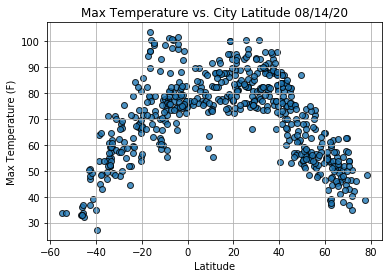

In [9]:
# Build scatter plot for Latitude vs. Temperature
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('Max Temperature vs. City Latitude',
           'Latitude', 'Max Temperature (F)')

# Save the figure
plt.savefig('../output_data/Max_Temp_vs_Latitude.png')

# Show the plot
plt.show()

#### Latitude vs. Humidity Plot

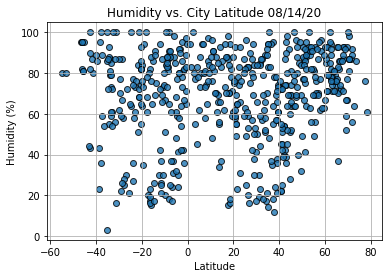

In [10]:
# Build scatter plot for Latitude vs. Humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('Humidity vs. City Latitude', 'Latitude', 'Humidity (%)')

# Save the figure
plt.savefig('../output_data/Humidity_vs_Latitude.png')

# Show the plot
plt.show()

#### Latitude vs. Cloudiness Plot

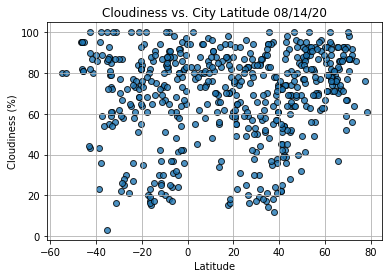

In [11]:
# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('Cloudiness vs. City Latitude', 'Latitude', 'Cloudiness (%)')

# Save the figure
plt.savefig('../output_data/Cloudiness_vs_Latitude.png')

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

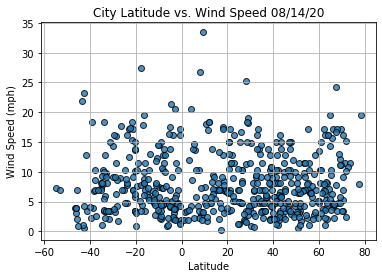

In [12]:
# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
label_plot('City Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (mph)')

# Save the figure
plt.savefig('../output_data/Wind_Speed_vs_Latitude.png')

# Show the plot
plt.show()

## Linear Regression

In [13]:
# Create a function to create linear regression plots
def linear_regress(title,x_values, y_values,x_label,y_label):
    
    # Run regression on given values 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Create line to display the linear regression
    regress_values = x_values * slope + intercept
    
    # String of regression equation
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, 'r-')
    label_plot(title, x_label, y_label, line_eq)
    
    # Display the r-squared value to see how well the data fits the line
    print(f'The r-squared value is: {rvalue**2}')

In [14]:
# Separate data into Northern and Southern Hemisphere DataFrames
northernHemisphere_df = city_data_df.loc[city_data_df['Latitude']>0]
southernHemisphere_df = city_data_df.loc[city_data_df['Latitude']<0]

#### Nothern Hemisphere - Max Temp vs Latitude Linear Regression

The r-squared value is: 0.575596106304712


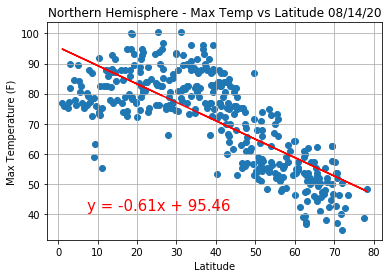

In [15]:
# Set table parameters
title = 'Northern Hemisphere - Max Temp vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Max Temperature']
x_label = 'Latitude'
y_label = 'Max Temperature (F)'

# Build scatter plot and linear regression for Max Temp vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Max_Temp_vs_Latitude_North.png')

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5924218593938851


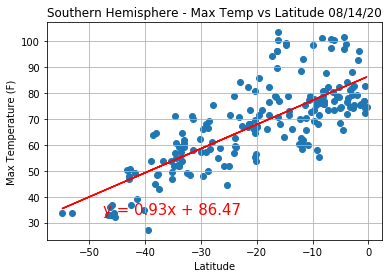

In [16]:
# Set table parameters
title = 'Southern Hemisphere - Max Temp vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Max Temperature']
x_label = 'Latitude'
y_label = 'Max Temperature (F)'

# Build scatter plot and linear regression for Max Temp vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Max_Temp_vs_Latitude_South.png')

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.023994687352144394


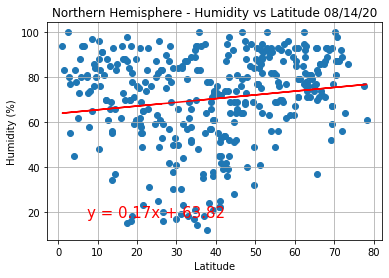

In [17]:
# Set table parameters
title = 'Northern Hemisphere - Humidity vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'

# Build scatter plot and linear regression for Humidity vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Humidity_vs_Latitude_North.png')

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.015282870415719456


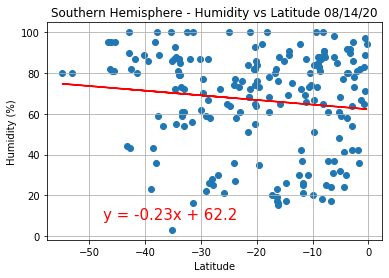

In [18]:
# Set table parameters
title = 'Southern Hemisphere - Humidity vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'

# Build scatter plot and linear regression for Humidity vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Humidity_vs_Latitude_South.png')

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.00038485072366667986


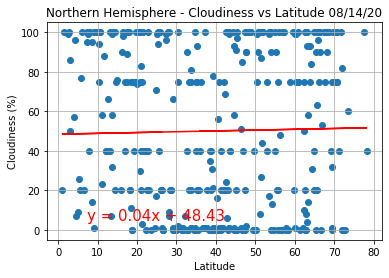

In [19]:
# Set table parameters
title = 'Northern Hemisphere - Cloudiness vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'

# Build scatter plot and linear regression for Cloudiness vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Cloudiness_vs_Latitude_North.png')

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.020137771753186356


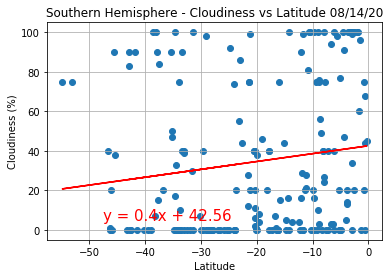

In [20]:
# Set table parameters
title = 'Southern Hemisphere - Cloudiness vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'

# Build scatter plot and linear regression for Cloudiness vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Cloudiness_vs_Latitude_South.png')

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 1.555212959692442e-05


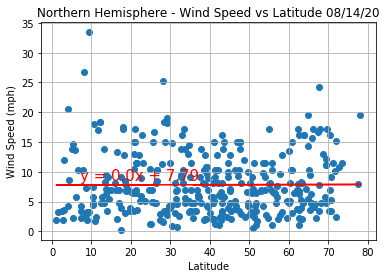

In [21]:
# Set table parameters
title = 'Northern Hemisphere - Wind Speed vs Latitude'
x_values = northernHemisphere_df['Latitude']
y_values = northernHemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'

# Build scatter plot and linear regression for Wind Speed vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Wind_Speed_vs_Latitude_North.png')

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 3.927804193435508e-06


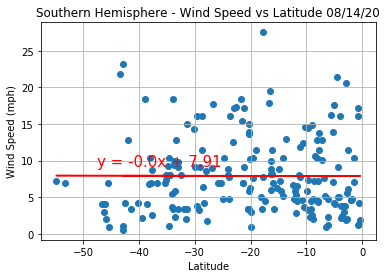

In [22]:
# Set table parameters
title = 'Southern Hemisphere - Wind Speed vs Latitude'
x_values = southernHemisphere_df['Latitude']
y_values = southernHemisphere_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed (mph)'

# Build scatter plot and linear regression for Wind Speed vs Latitude
linear_regress(title, x_values, y_values, x_label, y_label)

# Save the figure
plt.savefig('../output_data/Wind_Speed_vs_Latitude_South.png')